# Data Resources
We get stock prices of Unilever Group from YahooFinance via a Python library called: yfinance.

After getting the data, save it to a csv for further analysis.

In [29]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplfinance as mpf

In [30]:
# Retrieve Unilever's stock data
# unilever = yf.Ticker("UL")
# df = unilever.history(period="5y")

df = pd.read_csv('../Data/unilever_stock_price.csv', parse_dates=['Date'], index_col='Date')


In [31]:
# Export Unilever stock data to CSV
df.to_csv('../Data/unilever_stock_price.csv')



# Central Tendency Measures Calculation
Here we pay attention to daily close price of stock. Find out the mean, mode, median measures of the stock close price per year for the 5 closest years.

In [32]:
df['Close'].describe()
df.index = pd.to_datetime(df.index, utc=True)
mean_close_price = df['Close'].mean()
med_close_price = df['Close'].median()

In [33]:
mean_close_price

48.72712667189266

In [34]:

# Resample the data to monthly
stock_price_by_month = df.resample('M').agg({'Open': 'first', 
                                       'High': 'max', 
                                       'Low': 'min', 
                                       'Close': 'last', 
                                       'Volume': 'sum'})

# Prepare the data for mplfinance
stock_price_by_month.index = pd.to_datetime(stock_price_by_month.index, utc=True)

In [35]:
descriptive_stats = df.groupby(df.index.year)['Close'].mean()
descriptive_stats = descriptive_stats.to_frame()
descriptive_stats.columns = ['Mean Close Price']
descriptive_stats['Median Close Price'] = df.groupby(df.index.year)['Close'].median()
descriptive_stats['Mode Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: round(x).value_counts().index[0])
descriptive_stats['Standard Deviation Close Price'] = df.groupby(df.index.year)['Close'].std()
descriptive_stats['Variance Close Price'] = df.groupby(df.index.year)['Close'].var()
descriptive_stats['Skewness Close Price'] = df.groupby(df.index.year)['Close'].skew()
descriptive_stats

,Mean Close Price,Median Close Price,Mode Close Price,Standard Deviation Close Price,Variance Close Price,Skewness Close Price
Date,,,,,,
2019,49.238681,49.549686,50.0,1.168951,1.366446,-0.227425
2020,48.791007,50.107098,51.0,3.759760,14.135796,-0.576194
2021,49.678159,49.383324,48.0,2.250930,5.066687,0.225732
2022,43.226349,42.313736,42.0,2.554998,6.528015,0.601180
2023,48.103349,47.764046,47.0,1.786170,3.190404,0.481169
2024,54.547003,54.127239,48.0,6.421601,41.236965,0.192196


## Line Plot of Close Price with SMA

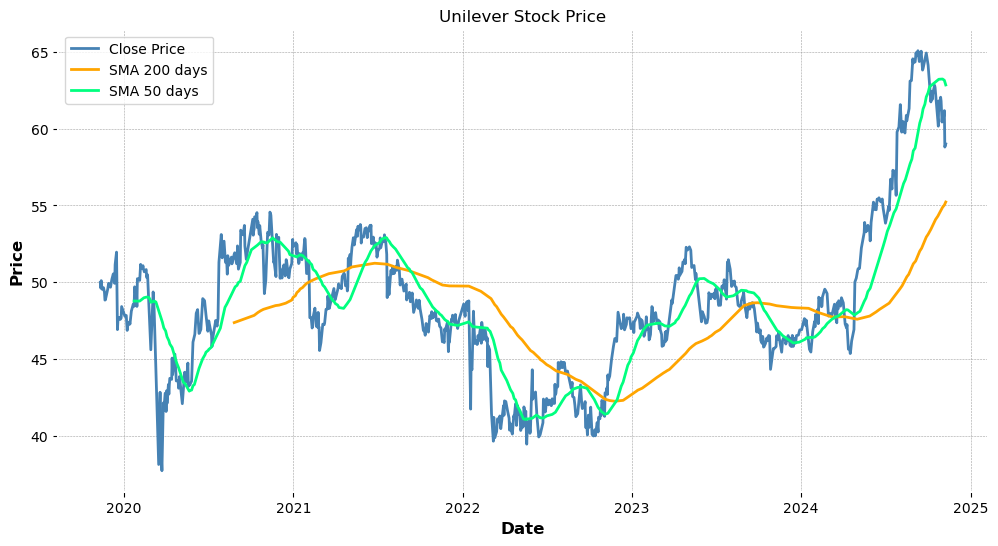

In [36]:
# Plot the data
df['SMA_50'] = df['Close'].rolling(window=50).mean() # mid-term trend
df['SMA_200'] = df['Close'].rolling(window=200).mean() # long-term trend

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Close Price', color='steelblue')
# simple running average
plt.plot(df.index, df['SMA_200'], label='SMA 200 days', color='orange')
plt.plot(df.index, df['SMA_50'], label='SMA 50 days', color='springgreen')

plt.title('Unilever Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

The **Unilever Stock Price Chart** above reveals the stock's fluctuations over recent years, highlighting key events and market responses.

**Early 2020**:  
The chart shows a steep decline in early 2020, primarily due to the global economic downturn caused by the COVID-19 pandemic. This unprecedented event led to significant market volatility, and Unilever's stock was no exception.

**2021**:  
Following the initial shock, Unilever's stock showed signs of recovery in 2021, as the global economy gradually reopened and demand for consumer goods rebounded. However, market stability was limited as concerns about supply chain disruptions and inflation emerged.

**2022**:  
Unilever's stock price experienced a noticeable dip in 2022. This period was marked by substantial input cost inflation, largely influenced by the geopolitical conflict in Ukraine, which affected global commodity prices and market stability. [Unilever: Strong execution in challenging conditions](https://www.unilever.com/news/press-and-media/press-releases/2022/strong-execution-in-challenging-conditions/)

Additionally, Unilever faced criticism over its strategic decisions, including an unsuccessful $68 billion bid for GSK’s consumer healthcare unit. This move raised concerns among investors, impacting the stock's performance as they questioned the company's growth strategy. [GSK rejects £50 billion Unilever bid for consumer arm](https://www.euronews.com/2022/01/20/gsk-m-a-unilever-stocks)

**2023-2024**:  
A significant turnaround occurred in late 2023 and 2024, with Unilever's stock price showing robust growth. Under the guidance of CEO Hein Schumacher, the company shifted its focus towards its strongest brands, yielding higher profits in the first half of 2024. This strategic pivot was well-received by the market, boosting investor confidence. [Unilever hails progress in turnaround efforts](https://www.thetimes.com/business-money/companies/article/unilever-hails-progress-in-turnaround-efforts-pw7pntx8h)

Furthermore, Unilever announced its intention to spin off its ice cream division, which includes notable brands like Ben & Jerry’s, by the end of 2025. This strategic move is anticipated to allow Unilever to focus on higher-margin, faster-growing categories, thereby enhancing profitability and growth prospects. [Removing Ben & Jerry’s ‘distraction’ allows for Unilever double upgrade, Bank of America says](https://www.marketwatch.com/story/removing-ben-jerrys-distraction-allows-for-unilever-double-upgrade-bank-of-america-says-9280bcfd)

**Overall Trends**:  
From the chart, we can observe that Unilever's stock price has experienced both periods of stability and volatility over the years. The mean (dotted blue line) and median (dotted orange line) stock prices indicate that, despite the fluctuations, Unilever has maintained an average price around the $50 mark. The recent uptick above the mean and median levels in 2024 suggests strong momentum as the company’s new strategic direction gains traction.

This analysis underscores the impact of global events, strategic corporate decisions, and leadership on Unilever’s stock performance. Investors appear optimistic about the company’s future, especially with a focus on high-growth, high-margin categories, positioning Unilever for sustained growth.


### Long-Term Trend (200 Days SMA)

- **Gradual Upward Movement**: Over the last 200 days, Unilever's stock price has shown a steady upward trend, although with occasional dips. This suggests overall positive growth and sustained investor confidence in the company’s long-term potential.

- **Periodic Declines Every 1.5 Years**: Historically, the 200-day SMA shows a pattern of slight declines approximately every 1.5 years, potentially due to broader economic cycles, market corrections, or company-specific factors impacting performance.

### Mid-Term Trend (50 Days SMA)

- **Consistent Upward Trajectory**: The 50-day SMA also indicates a general upward direction, with more frequent short-term fluctuations than the 200-day SMA. These variations likely reflect factors such as quarterly earnings, industry developments, or shifts in investor sentiment.

- **Monthly or Quarterly Variations**: Short-term fluctuations are common and appear linked to Unilever’s marketing efforts, new product launches, or seasonal changes in consumer demand, which can influence stock performance over a shorter period.


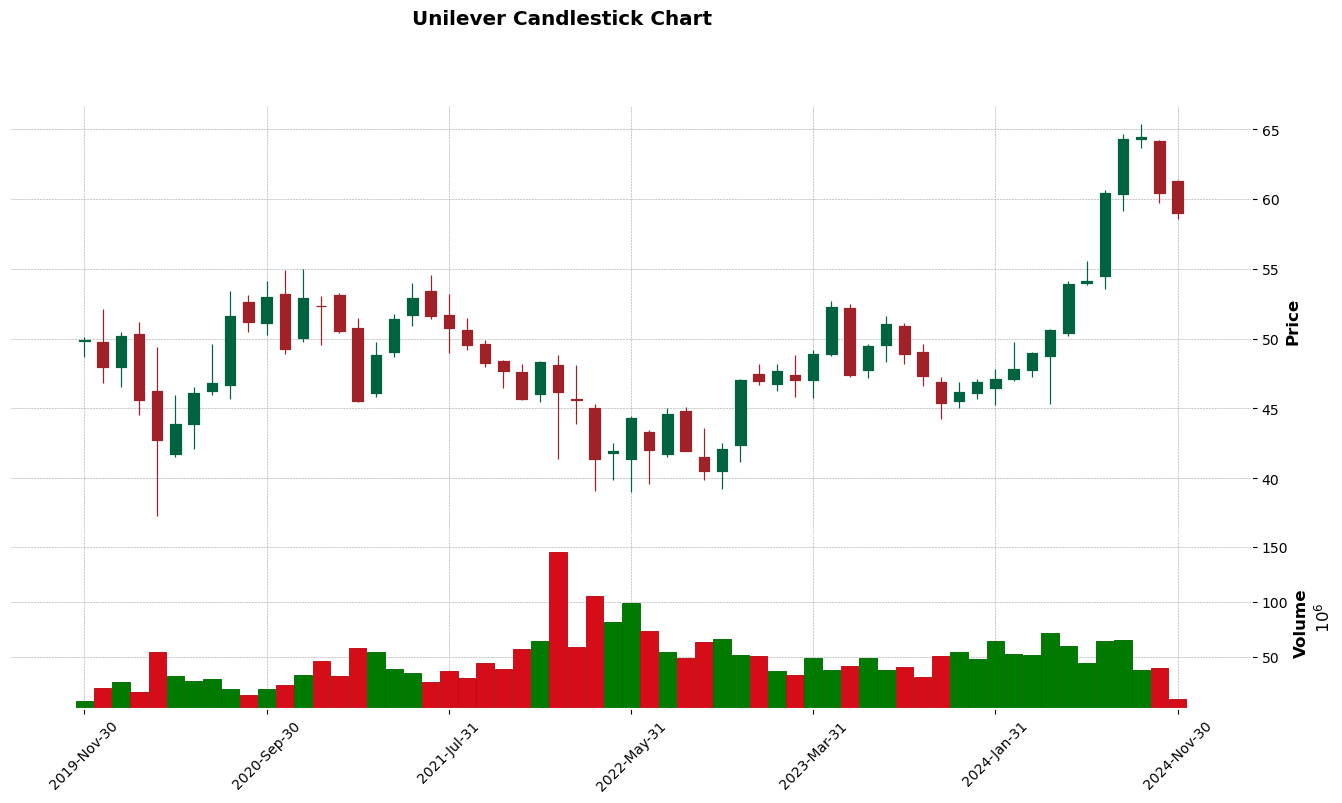

In [37]:
mpf.plot(stock_price_by_month, type='candle', volume=True, title='Unilever Candlestick Chart', ylabel='Price', ylabel_lower='Volume', style='charles', figratio=(12, 6), figscale=1.5)

### Analysis of Unilever's Candlestick Chart and Trading Volume

1. **Sharp Decline (Early 2020)**:
   - **Candlestick Chart**: In early 2020, the chart shows a sharp decline, with many consecutive red candles indicating high selling pressure. This reflects panic among investors who rapidly sold off shares.
   - **Trading Volume**: Trading volume spiked during this period, showing strong selling activity from investors. This period aligns with the beginning of the COVID-19 pandemic, which caused significant market instability.

2. **Recovery Phase (Mid 2020 - Early 2022)**:
   - **Candlestick Chart**: From mid-2020 to early 2022, Unilever's stock price gradually recovered with many green candles, indicating an upward trend. Some candles have long wicks, showing intraday price fluctuations, but the overall trend remained positive.
   - **Trading Volume**: Trading volume stabilized compared to early 2020, indicating a gradual recovery and renewed investor confidence. This period coincided with economies adjusting to the pandemic and the impact of economic stimulus measures.

3. **Stabilization Phase (2022 - Early 2024)**:
   - **Candlestick Chart**: From 2022 to early 2024, the chart shows smaller candles with no clear trend, indicating stable stock prices with minimal large fluctuations.
   - **Trading Volume**: Trading volume decreased and remained stable during this period, reflecting investor consensus on Unilever's valuation. There was no significant upward or downward movement, possibly due to the uncertain post-pandemic economic environment.

4. **Strong Growth (Late 2023 - Early 2024)**:
   - **Candlestick Chart**: From late 2023 to early 2024, the chart shows a strong upward movement with many large green candles, indicating rapid stock growth for Unilever.
   - **Trading Volume**: Trading volume increased slightly, suggesting renewed investor interest as the company executed strategic business improvements. This increase may also reflect confidence in the new company leadership and growth strategies.

5. **Volume Fluctuations and Their Significance**:
   - **Volume Variations**: Trading volume typically rises during significant market moves, such as the sell-off in early 2020 and the buying surge in late 2023. These fluctuations highlight the market's sensitivity to major economic events or important strategic changes within the company.



### Summary:
Unilever's candlestick chart and trading volume reveal distinct phases of market behavior: a sharp decline due to COVID-19, a recovery phase, a stabilization period, and a strong growth phase in late 2023. Volume fluctuations align with these phases, reflecting strong investor reactions to global events and strategic decisions within the company.


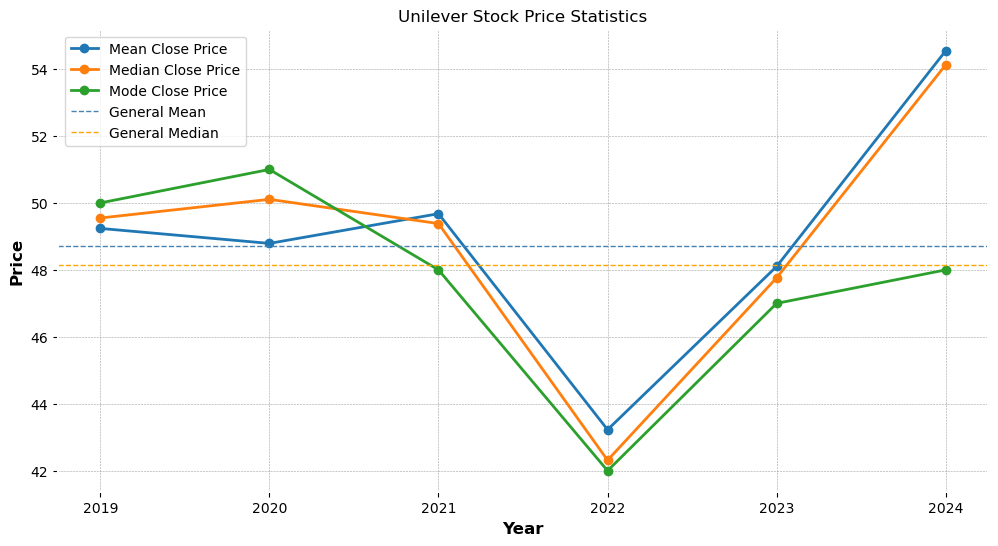

In [38]:
plt.figure(figsize=(12, 6))

# Plot each statistic
plt.plot(descriptive_stats.index, descriptive_stats['Mean Close Price'], label='Mean Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Median Close Price'], label='Median Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Mode Close Price'], label='Mode Close Price', marker='o')

# Draw horizontal lines for general mean and median (using the last available year’s statistics as examples)
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='General Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='General Median')

# Set labels and title
plt.title("Unilever Stock Price Statistics")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()


### Overview of Unilever Stock Price Statistics (2019 - 2024)

The chart displays the mean, median, and mode closing prices of Unilever’s stock from 2019 to 2024, offering insights into overall trends and notable variations.

#### Key Observations:

- **Downward Trend (2019 - 2022)**:
   - From 2019 to 2022, all three central measures (mean, median, mode) show a downward trend, reaching their lowest point in 2022. This reflects the challenges Unilever faced, likely due to external economic pressures and internal strategic issues, such as rising costs and uncertain market conditions.

- **Distinct Separation in 2020**:
   - In 2020, the mean, median, and mode diverge significantly, with the mode noticeably lower than the mean and median. This separation suggests a period of volatility, primarily due to the impact of the COVID-19 pandemic. The lower mode indicates frequent trading at lower prices as investors responded to market uncertainty and conducted sell-offs, while the mean and median were sustained by occasional higher trading prices during brief recovery phases.

- **Stabilization in 2021 and 2022**:
   - The three measures come closer together in 2021 and 2022, showing less volatility as prices stabilized. This could indicate a period of market consensus on Unilever’s valuation, with reduced fluctuations in trading behavior.

- **Strong Recovery (2023 - 2024)**:
   - From 2023 to 2024, the stock shows a clear recovery, with all three measures rising. Notably, the mode rises above the mean and median in 2024, indicating frequent trading at higher prices. This suggests renewed investor confidence, likely driven by Unilever’s strategic refocusing on core brands and plans for divestments in less profitable segments.

#### Summary:
Overall, the chart illustrates Unilever’s stock performance as it navigated challenges from 2019 to 2022, with a sharp decline due to the COVID-19 impact and subsequent economic pressures. The distinct separation in 2020 highlights market uncertainty, while the strong recovery from 2023 to 2024 reflects positive investor sentiment toward Unilever’s strategic changes, positioning the company for future growth.


C:\Users\lamma\AppData\Local\Temp\ipykernel_34060\2549432710.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([close_price_2019[2019], close_price_2020[2020], close_price_2021[2021], close_price_2022[2022], close_price_2023[2023], close_price_2024[2024]], labels=years)


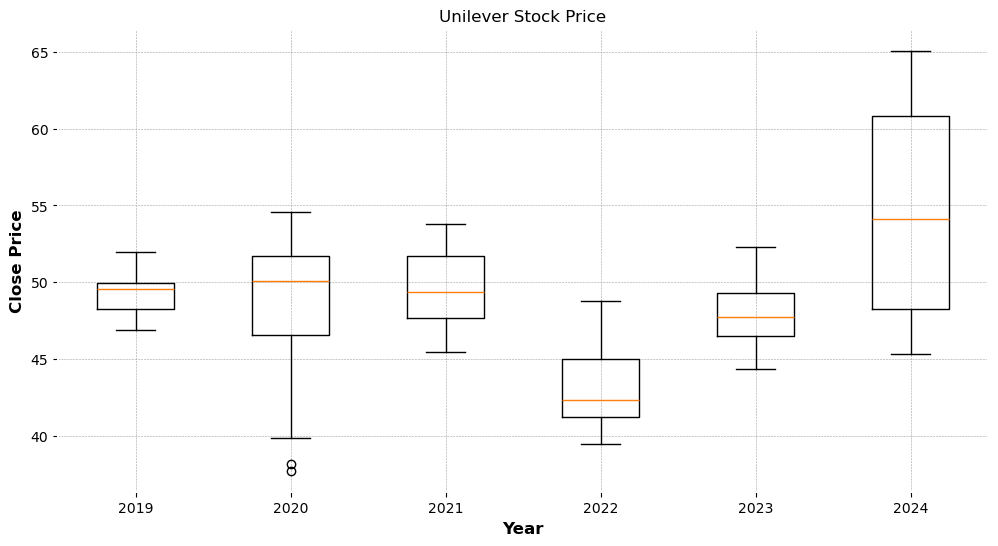

In [39]:
years = [2019, 2020, 2021, 2022, 2023, 2024]
def extract_data_by_year(year):
    year_df = df['Close'][df.index.year == year]
    year_df.reset_index(drop=True, inplace=True)
    year_df = year_df.to_frame()
    year_df.columns = [year]
    return year_df
close_price_2019 = extract_data_by_year(2019)
close_price_2020 = extract_data_by_year(2020)
close_price_2021 = extract_data_by_year(2021)
close_price_2022 = extract_data_by_year(2022)
close_price_2023 = extract_data_by_year(2023)
close_price_2024 = extract_data_by_year(2024)

plt.figure(figsize=(12, 6))
plt.boxplot([close_price_2019[2019], close_price_2020[2020], close_price_2021[2021], close_price_2022[2022], close_price_2023[2023], close_price_2024[2024]], labels=years)
plt.title('Unilever Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

### Dispersion Measure Insights for Unilever Stock Price (2019 - 2024)

This box plot provides insights into the distribution of Unilever's stock price across each year, revealing important variations and trends.

1. **2019 (Stable Performance)**:
   - **Observation**: The interquartile range (IQR) in 2019 is narrow, with close grouping around the median and minimal variation.
   - **Insight**: This suggests a year of stable trading, with little volatility. Unilever's stock maintained a consistent value, indicating steady investor sentiment and limited external impact.

2. **2020 - High Volatility Amid COVID-19**:
   - **Observation**: The IQR widens significantly in 2020, with the lower whisker extending below 40 and an outlier. The median is slightly above 50, but the spread reflects large fluctuations.
   - **Insight**: This year captures the impact of the COVID-19 pandemic, as heightened uncertainty led to panic selling and significant price drops. The lower whisker and outlier reflect periods of intense market pressure, with investors reacting to global economic concerns and potential disruptions in Unilever’s consumer goods supply chain.

3. **2021 - Recovery and Stabilization**:
   - **Observation**: The IQR in 2021 narrows compared to 2020, with the median still around 50, suggesting a partial recovery but with reduced volatility.
   - **Insight**: As economies adapted to pandemic conditions, investor confidence began to stabilize. The stock price showed resilience, and the reduced range indicates a more balanced market response, although there was still some caution among investors.

4. **2022 - Consolidation Phase**:
   - **Observation**: The box for 2022 has a narrower IQR and overall range, with the median dropping slightly below 50.
   - **Insight**: This suggests a consolidation phase where Unilever's stock price found equilibrium at a lower level. The reduced volatility implies that investors had reached a consensus on valuation, possibly due to inflation concerns and rising production costs impacting the company's profitability.

5. **2023 - Initial Signs of Growth**:
   - **Observation**: In 2023, the median price increases slightly, with a moderate IQR and minimal outliers.
   - **Insight**: This indicates early signs of recovery and renewed investor interest in Unilever, likely driven by strategic shifts or improved performance. The moderate spread reflects steady growth, with less extreme fluctuations, as the market shows cautious optimism.

6. **2024 - Strong Uptrend and Increased Trading Range**:
   - **Observation**: The IQR and range expand significantly in 2024, with the median climbing to the highest point in the observed years.
   - **Insight**: The broad IQR and high median in 2024 suggest a strong uptrend and increased investor confidence. This growth may reflect Unilever’s successful strategic realignments or positive market reception to recent business moves. The wide range indicates heightened trading activity and diverse valuations, with the market showing enthusiasm for Unilever's long-term potential.


### Summary
The box plot shows Unilever’s stock journey through significant challenges in 2020 due to COVID-19, followed by gradual stabilization in 2021 and 2022. Recovery began in 2023, with a marked uptrend in 2024, suggesting renewed investor confidence. The increased trading range and high median in 2024 signal optimism about Unilever’s growth trajectory and strategic direction.
